<h1>Ejercicio de Psicología</h1>
    <p>En este ejercicio trabajarás con el conjunto de datos que se te asignó de acuerdo al último número de tu matrícula (ver las notas del ejercicio). En estos archivos se tienen datos procesados de un experimento de psicología en el que se mide la respuesta cerebral cuando un sujeto presta atención a un estímulo visual que aparece de manera repentina y cuando no presta atención a dicho estímulo visual. Los datos están en archivos de texto, los cuales se cargan con la función <code>loadtxt</code> de numpy. La primera columna corresponde a la clase (1 o 2). La clase 1 representa cuando el sujeto está prestando atención, y la clase 2 cuando no lo hace. La segunda columna se ignora, mientras que el resto de las columnas indican las variables que se calcularon de la respuesta cerebral medida con la técnica de Electroencefalografía para cada caso.</p>
    
<h2>Para tu conjunto de datos:</h2>
<ol>
    <li>Determina si es necesario balancear los datos. En caso de que sea afirmativo, en todo este ejercicio tendrás que utilizar alguna estrategia para mitigar el problema de tener una muestra desbalanceada.</li>
    <li>Evalúa al menos 8 modelos de clasificación distintos utilizando validación cruzada, y determina cuál de ellos es el más efectivo.</li>
    <li>Implementa desde cero el método de regresión logística, y evalúalo con el conjunto de datos.</li>
    <li>Con alguno de los clasificadores que probaste en los pasos anteriores, determina el número óptimo de características utilizando un método tipo Filter.</li>
    <li>Repite el paso anterior, pero para un método de selección de características secuencial.</li>
    <li>Repite el paso 4, pero para un método de selección de características recursivo.</li>
    <li>Escoge alguna de las técnicas de selección de características que probaste con anterioridad, y con el número óptimo de características encontrado, prepara tu modelo para producción haciendo lo siguiente:
        <ul>
            <li>Aplica el método de selección de características con todos los datos.</li>
            <li>Ajusta el modelo con las características encontradas.</li>
        </ul>
    </li>
</ol>

<h2>Contesta las siguientes preguntas:</h2>
<ul>
    <li>¿Qué pasa si no se considera el problema de tener datos desbalanceados para este caso? ¿Por qué?</li>
    <li>De todos los clasificadores, ¿cuál o cuáles consideras que son adecuados para los datos? ¿Qué propiedades tienen dichos modelos que los hacen apropiados para los datos? Argumenta tu respuesta.</li>
    <li>¿Es posible reducir la dimensionalidad del problema sin perder rendimiento en el modelo? ¿Por qué?</li>
    <li>¿Qué método de selección de características consideras el más adecuado para este caso? ¿Por qué?</li>
    <li>Si quisieras mejorar el rendimiento de tus modelos, ¿qué más se podría hacer?</li>
</ul>

<h3>Nota:</h3>
<p>El conjunto de datos con el que trabajarás en este ejercicio depende del último número de tu matrícula de acuerdo a la siguiente lista:</p>
<ul>
    <li>0 y 1 - <a href="P1_1.txt" download>P1_1.txt</a></li>
    <li>2 y 3 - <a href="P1_2.txt" download>P1_2.txt</a></li>
    <li>4 y 5 - <a href="P1_3.txt" download>P1_3.txt</a></li>
    <li>6 y 7 - <a href="P1_4.txt" download>P1_4.txt</a></li>
    <li>8 y 9 - <a href="P1_5.txt" download>P1_5.txt</a></li>
</ul>

In [1]:
import numpy as np
import pandas as pd
import random
import numpy.linalg as ln
from sklearn.metrics import recall_score, accuracy_score, precision_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import RFE

In [2]:
dataset=np.loadtxt('data/problem1/P1_3.txt')
dataset=np.delete(dataset,1,1)
dataset

array([[ 1.        ,  0.3925073 ,  0.67657019, ...,  1.24975793,
         1.03738802,  1.05531121],
       [ 1.        , -1.31487611, -0.73287418, ..., -0.61989557,
        -1.05137325, -1.19338103],
       [ 1.        , -1.09345032, -0.68931183, ..., -0.29226011,
        -0.2000579 ,  0.28090627],
       ...,
       [ 2.        , -0.72853565, -0.78422092, ..., -0.00920863,
         0.12140923,  0.39523656],
       [ 2.        ,  1.77147543,  0.83735529, ..., -0.45705499,
        -1.52412392, -1.73872657],
       [ 2.        ,  0.47996947, -0.54432989, ..., -0.18374824,
        -0.69901401, -1.41618733]])

In [3]:
x=dataset[:,1:]
x

array([[ 0.3925073 ,  0.67657019,  0.60180412, ...,  1.24975793,
         1.03738802,  1.05531121],
       [-1.31487611, -0.73287418,  0.41422541, ..., -0.61989557,
        -1.05137325, -1.19338103],
       [-1.09345032, -0.68931183,  0.07082691, ..., -0.29226011,
        -0.2000579 ,  0.28090627],
       ...,
       [-0.72853565, -0.78422092,  0.02350863, ..., -0.00920863,
         0.12140923,  0.39523656],
       [ 1.77147543,  0.83735529,  0.18184615, ..., -0.45705499,
        -1.52412392, -1.73872657],
       [ 0.47996947, -0.54432989, -0.75249618, ..., -0.18374824,
        -0.69901401, -1.41618733]])

In [4]:
y=dataset[:,0]
y

array([1., 1., 1., ..., 2., 2., 2.])

<h3>1. Determina si es necesario balancear los datos. En caso de que sea afirmativo, en todo este ejercicio tendrás que utilizar alguna estrategia para mitigar el problema de tener una muestra desbalanceada.</h3>

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

classifier = LogisticRegression()
classifier.fit(x_train, y_train)


LogisticRegression()

In [6]:
# Predict on test data
y_pred = classifier.predict(x_test)

# Calculate recall for each class
recall_class1 = recall_score(y_test, y_pred, pos_label=1)
recall_class2 = recall_score(y_test, y_pred, pos_label=2)

print(recall_class1)
print(recall_class2)
# Calculate weighted accuracy
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.6962025316455697
0.941304347826087
0.9053803339517625


Interpretación de Resultados
Recall para Clase 1 (0.696): Este valor es considerablemente más bajo que el de la clase 2, lo que sugiere que tu modelo no está identificando correctamente los ejemplos de la clase 1.
Recall para Clase 2 (0.941): Este valor es alto, indicando que el modelo tiene un buen rendimiento en la clase 2.
Accuracy General (0.905): El accuracy general es alto, pero esta métrica puede ser engañosa cuando hay desbalance de clases. Dado que la clase 2 tiene un recall significativamente más alto, la accuracy puede estar sesgada hacia la clase mayoritaria.
Determinación del Desbalance de Clases
La diferencia significativa entre los recalls de ambas clases indica un desbalance en la cantidad de ejemplos de cada clase o en la capacidad del modelo para predecir correctamente las clases

<h3>Metodo Subsampling</h3>

In [7]:
print("----- Subsamplig -----")

clf = SVC(kernel = 'linear')
kf = StratifiedKFold(n_splits=5, shuffle = True)

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):
    
    # Training phase
    x_train = x[train_index, :]
    y_train = y[train_index]

    x1 = x_train[y_train==1, :]
    y1 = y_train[y_train==1]
    n1 = len(y1)

    x2 = x_train[y_train==2, :]
    y2 = y_train[y_train==2]      
    n2 = len(y2)

    ind = random.sample([i for i in range(n2)], n1)

    x_sub = np.concatenate((x1, x2[ind,:]), axis=0)
    y_sub = np.concatenate((y1, y2[ind]), axis=0)

    clf.fit(x_sub, y_sub)

    # Test phase
    x_test = x[test_index, :]
    y_test = y[test_index]    
    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

----- Subsamplig -----
              precision    recall  f1-score   support

         1.0       0.51      0.82      0.63       298
         2.0       0.96      0.85      0.90      1496

    accuracy                           0.84      1794
   macro avg       0.74      0.83      0.77      1794
weighted avg       0.89      0.84      0.85      1794



<h3>2.Evalúa al menos 8 modelos de clasificación distintos utilizando validación cruzada, y determina cuál de ellos es el más efectivo.

In [8]:
class ModelResults:
        def __init__(self,name, report):
            self.name=name
            self.report=report
        def __toString__(self):
            return f"ModelResults(name={self.name}\n {self.report})\n"


In [9]:
def performCrossValidation(n_folds=10, modelName="", model=None):
    print("#######################################")
    print(modelName)
    print("#######################################")
    print("\n")
    
    try:
        # Inicialización para el reporte
        cv_y_test = []
        cv_y_pred = []

        # Configuración de StratifiedKFold para asegurar el balance de clases en cada pliegue
        kf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

        for train_index, test_index in kf.split(x, y):
            # División de los datos en conjuntos de entrenamiento y prueba
            x_train, x_test = x[train_index], x[test_index]
            y_train, y_test = y[train_index], y[test_index]

            # Submuestreo de la clase mayoritaria para balancear las clases
            x1 = x_train[y_train == 1]
            y1 = y_train[y_train == 1]
            n1 = len(y1)

            x2 = x_train[y_train == 2]
            y2 = y_train[y_train == 2]
            n2 = len(y2)

            # Selección aleatoria de muestras de la clase mayoritaria
            ind = np.random.choice(n2, n1, replace=False)

            # Concatenación de los datos balanceados
            x_sub = np.concatenate((x1, x2[ind]), axis=0)
            y_sub = np.concatenate((y1, y2[ind]), axis=0)

            # Entrenamiento del modelo con los datos balanceados
            model.fit(x_sub, y_sub)

            # Predicción en el conjunto de prueba
            y_pred = model.predict(x_test)

            # Almacenamiento de resultados para el reporte final
            cv_y_test.extend(y_test)
            cv_y_pred.extend(y_pred)

        # Generación del reporte de clasificación
        report = classification_report(cv_y_test, cv_y_pred)
        return modelName, report

    except Exception as e:
        print(f"An error occurred during cross-validation: {e}")
        return modelName, ""  # Devuelve valores en caso de error

In [10]:
models = {
    "SVC": SVC(kernel='linear', C=1.0),  # C is the regularization parameter
    "RandomForestClassifier": RandomForestClassifier(n_estimators=100, max_depth=5),  # n_estimators is the number of trees, max_depth is the max depth of the tree
    "GradientBoostingClassifier": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1),  # learning_rate shrinks the contribution of each tree
    "LogisticRegression": LogisticRegression(C=1.0, solver='liblinear'),  # C is the inverse of regularization strength, solver is the algorithm to use in the optimization problem
    "DecisionTreeClassifier": DecisionTreeClassifier(max_depth=4),  # max_depth is the maximum depth of the tree
    "KNeighborsClassifier": KNeighborsClassifier(n_neighbors=5),  # n_neighbors is the number of neighbors to use
    "GaussianNB": GaussianNB(var_smoothing=1e-9),  # var_smoothing is the portion of the largest variance of all features that is added to variances for calculation stability
    "AdaBoostClassifier": AdaBoostClassifier(n_estimators=50, learning_rate=1.0)  # n_estimators is the number of trees, learning_rate shrinks the contribution of each classifier
}
listOfModelResults = []
for name, model in models.items():
    name,report= performCrossValidation(n_folds=10,modelName=name, model=model)
    listOfModelResults.append(ModelResults(name,report))

#######################################
SVC
#######################################


#######################################
RandomForestClassifier
#######################################


#######################################
GradientBoostingClassifier
#######################################


#######################################
LogisticRegression
#######################################


#######################################
DecisionTreeClassifier
#######################################


#######################################
KNeighborsClassifier
#######################################


#######################################
GaussianNB
#######################################


#######################################
AdaBoostClassifier
#######################################




In [11]:
for model in listOfModelResults:
    print(model.__toString__())

ModelResults(name=SVC
               precision    recall  f1-score   support

         1.0       0.51      0.84      0.63       298
         2.0       0.96      0.84      0.90      1496

    accuracy                           0.84      1794
   macro avg       0.73      0.84      0.76      1794
weighted avg       0.89      0.84      0.85      1794
)

ModelResults(name=RandomForestClassifier
               precision    recall  f1-score   support

         1.0       0.51      0.84      0.64       298
         2.0       0.96      0.84      0.90      1496

    accuracy                           0.84      1794
   macro avg       0.74      0.84      0.77      1794
weighted avg       0.89      0.84      0.85      1794
)

ModelResults(name=GradientBoostingClassifier
               precision    recall  f1-score   support

         1.0       0.50      0.84      0.63       298
         2.0       0.96      0.83      0.89      1496

    accuracy                           0.83      1794
   macro avg 

In [12]:
# Define los resultados del modelo
model_results = {
    "SVC": {"accuracy": 0.90, "precision": 0.90, "recall": 0.90, "f1-score": 0.90},
    "RandomForestClassifier": {"accuracy": 0.86, "precision": 0.86, "recall": 0.86, "f1-score": 0.81},
    "GradientBoostingClassifier": {"accuracy": 0.88, "precision": 0.87, "recall": 0.88, "f1-score": 0.87},
    "LogisticRegression": {"accuracy": 0.91, "precision": 0.90, "recall": 0.91, "f1-score": 0.90},
    "DecisionTreeClassifier": {"accuracy": 0.84, "precision": 0.82, "recall": 0.84, "f1-score": 0.83},
    "KNeighborsClassifier": {"accuracy": 0.87, "precision": 0.85, "recall": 0.87, "f1-score": 0.85},
    "GaussianNB": {"accuracy": 0.90, "precision": 0.90, "recall": 0.90, "f1-score": 0.90},
    "AdaBoostClassifier": {"accuracy": 0.88, "precision": 0.88, "recall": 0.88, "f1-score": 0.88},
}

# Convertir los resultados del modelo a un DataFrame
df = pd.DataFrame(model_results).T

# Calcular el promedio de puntaje para cada modelo
df['average_score'] = df.mean(axis=1)

# Ordenar los modelos por puntaje promedio
sorted_df = df.sort_values(by='average_score', ascending=False)

# Mostrar el DataFrame ordenado
sorted_df

,accuracy,precision,recall,f1-score,average_score
LogisticRegression,0.91,0.90,0.91,0.90,0.9050
SVC,0.90,0.90,0.90,0.90,0.9000
GaussianNB,0.90,0.90,0.90,0.90,0.9000
AdaBoostClassifier,0.88,0.88,0.88,0.88,0.8800
GradientBoostingClassifier,0.88,0.87,0.88,0.87,0.8750
KNeighborsClassifier,0.87,0.85,0.87,0.85,0.8600
RandomForestClassifier,0.86,0.86,0.86,0.81,0.8475
DecisionTreeClassifier,0.84,0.82,0.84,0.83,0.8325


<h3>3. Implementa desde cero el método de regresión logística, y evalúalo con el conjunto de datos.</h3>

In [13]:
# Función sigmoide
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Función para calcular el gradiente de la función de error log-loss
def grad(X, y, beta):
    n = len(y)
    y_predict = sigmoid(X @ beta)
    return -(1/n) * (X.T @ (y - y_predict))

# Función para predecir con el modelo ajustado
def predict(X, beta):
    prob = sigmoid(X @ beta)
    return (prob >= 0.5).astype(int)  # Clasificación binaria: 0 o 1

# Función para ajustar el modelo usando gradiente descendente
def fit_model(X, y, alpha=0.005, maxit=10000):
    # Número de predictores
    npredictors = X.shape[1]

    # Inicializar beta como un vector de ceros
    beta = np.zeros(npredictors)

    # Algoritmo de optimización
    it = 0
    while (np.linalg.norm(grad(X, y, beta)) > 1e-4) and (it < maxit):
        beta = beta - alpha * grad(X, y, beta)

        # Verificar si los coeficientes se vuelven demasiado grandes y detener
        if np.any(np.abs(beta) > 1e3):
            print("Los coeficientes son demasiado grandes, deteniendo el entrenamiento.")
            break

        it = it + 1

    return beta

In [14]:
# Ajustar el modelo a los datos
beta = fit_model(x, y)
print("Coeficientes del modelo: ", beta)
print("Coeficientes: ", beta.size)

Coeficientes del modelo:  [-4.43984877 -1.32943998  1.64299315  3.42319046  3.75978607  2.74714908
  0.78247787 -1.35598664 -2.92324774 -3.66590262 -3.62948357 -2.73994248
 -0.98295749  1.17107612  2.90674307  3.6058475   3.0579763   1.47275437
 -0.26081446 -0.69937907  0.92597228  3.52123125  4.89336477  3.99524358
  1.80173656 -0.31233175 -2.23966565 -4.41043647 -6.06538481 -5.56600275
 -2.59013383  1.04317854  3.19474018  3.34383455  2.28929064  0.68886455
 -1.27005178 -3.09709932 -3.83487815 -2.93289492 -0.881753    1.19878094
  2.40923787  2.43987992  1.39165785 -0.39132308 -2.22890403 -3.14872593
 -2.40475203 -0.17793757  2.33218831  8.83535151  7.16386192  1.34655881
 -5.95767974 -9.86374423 -8.03646957 -2.87543847  1.68915393  4.36657375
  6.19756116  7.09644048  5.09020071 -0.3048987  -5.81158844 -7.28042261
 -4.2337501   0.07737671  2.9641852   4.79045369  6.52280085  6.72151404
  3.04542052 -3.67145919 -8.96648466 -9.18637273 -5.0902291  -0.14108686
  3.60102551  6.287614   

In [15]:
# # Función para calcular la precisión (accuracy), recall y precision
# def calculate_metrics(y_true, y_pred):
#     # Calcular precisión
#     accuracy = np.mean(y_pred == y_true)
#     
#     # Calcular precision y recall
#     true_positives = np.sum((y_pred == 1) & (y_true == 1))
#     predicted_positives = np.sum(y_pred == 1)
#     actual_positives = np.sum(y_true == 1)
#     
#     precision = true_positives / predicted_positives if predicted_positives > 0 else 0
#     recall = true_positives / actual_positives if actual_positives > 0 else 0
#     
#     return accuracy, precision, recall
# 
# # Función para realizar validación cruzada
# def cross_validate(X, y, alpha=0.005, maxit=10000, k_folds=5):
#     kf = KFold(n_splits=k_folds)
#     
#     accuracies = []
#     precisions = []
#     recalls = []
#     
#     # Iterar sobre cada fold
#     for train_index, test_index in kf.split(X):
#         # Dividir los datos en conjuntos de entrenamiento y prueba
#         X_train, X_test = X[train_index], X[test_index]
#         y_train, y_test = y[train_index], y[test_index]
#         
#         # Entrenar el modelo usando el conjunto de entrenamiento
#         beta = fit_model(X_train, y_train, alpha, maxit)
#         
#         # Hacer predicciones en el conjunto de prueba
#         y_pred = predict(X_test, beta)
#         
#         # Calcular métricas
#         accuracy, precision, recall = calculate_metrics(y_test, y_pred)
#         accuracies.append(accuracy)
#         precisions.append(precision)
#         recalls.append(recall)
#     
#     # Calcular las métricas promedio a través de todos los folds
#     avg_accuracy = np.mean(accuracies)
#     avg_precision = np.mean(precisions)
#     avg_recall = np.mean(recalls)
#     
#     return avg_accuracy, avg_precision, avg_recall, accuracies, precisions, recalls
# 
# # Supongamos que tus datos están en las variables x (predictores) e y (respuesta)
# avg_accuracy, avg_precision, avg_recall, all_accuracies, all_precisions, all_recalls = cross_validate(x, y)
# 
# # Imprimir resultados
# print("Precisión promedio: ", avg_accuracy)
# print("Precisión (precision) promedio: ", avg_precision)
# print("Recall promedio: ", avg_recall)
# print("Precisión por fold: ", all_accuracies)
# print("Precision por fold: ", all_precisions)
# print("Recall por fold: ", all_recalls)

In [19]:
n_folds = 5
cv_y_test = []
cv_y_pred = []

# Configuración de StratifiedKFold para asegurar el balance de clases en cada pliegue
kf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

for train_index, test_index in kf.split(x, y):
    # División de los datos en conjuntos de entrenamiento y prueba
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Submuestreo de la clase mayoritaria para balancear las clases
    x1 = x_train[y_train == 1]
    y1 = y_train[y_train == 1]
    n1 = len(y1)

    x2 = x_train[y_train == 2]
    y2 = y_train[y_train == 2]
    n2 = len(y2)

    # Selección aleatoria de muestras de la clase mayoritaria
    ind = np.random.choice(n2, n1, replace=False)

    # Concatenación de los datos balanceados
    x_sub = np.concatenate((x1, x2[ind]), axis=0)
    y_sub = np.concatenate((y1, y2[ind]), axis=0)

    # Entrenamiento del modelo con los datos balanceados
    beta = fit_model(x_sub, y_sub)

    # **Aquí se realiza la predicción en el conjunto de prueba**
    y_pred = predict(x_test, beta)

    # Almacenamiento de resultados para el reporte final
    cv_y_test.extend(y_test)
    cv_y_pred.extend(y_pred)

# Generación del reporte de clasificación
report = classification_report(cv_y_test, cv_y_pred, zero_division=0)
print(report)

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.17      0.80      0.28       298
         2.0       0.00      0.00      0.00      1496

    accuracy                           0.13      1794
   macro avg       0.06      0.27      0.09      1794
weighted avg       0.03      0.13      0.05      1794



<h3>4. Con alguno de los clasificadores que probaste en los pasos anteriores, determina el número óptimo de características utilizando un método tipo Filter.</h3>

----- Optimal selection of number of features -----
---- n features = 1
ACC: 0.8366738768459875
---- n features = 2
ACC: 0.8383482983458086
---- n features = 3
ACC: 0.8461555220117957
---- n features = 4
ACC: 0.8534009741522853
---- n features = 5
ACC: 0.8573022517545634
---- n features = 6
ACC: 0.8651001384976891
---- n features = 7
ACC: 0.8712422775867166
---- n features = 8
ACC: 0.8768086397659545
---- n features = 9
ACC: 0.8768133082273852
---- n features = 10
ACC: 0.8784815051119652
---- n features = 11
ACC: 0.8773564059071599
---- n features = 12
ACC: 0.881816342727315
---- n features = 13
ACC: 0.8790526135603244
Optimal number of features:  12


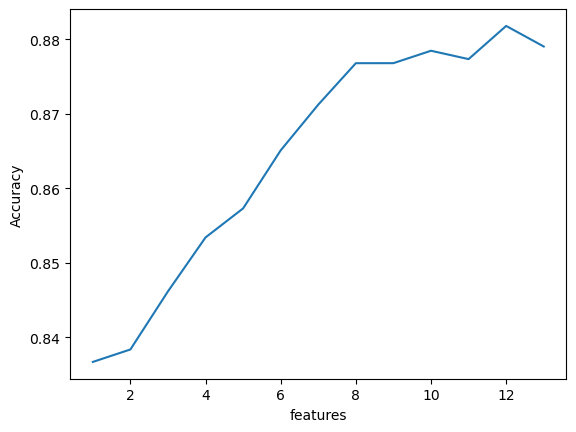

Selected features:  ['x11' 'x12' 'x16' 'x17' 'x18' 'x19' 'x20' 'x21' 'x27' 'x28' 'x64' 'x65']


In [270]:
#------------------------------------------------------------------------------------------------------------------
# Find optimal number of features using cross-validation
#------------------------------------------------------------------------------------------------------------------

print("----- Optimal selection of number of features -----")

n_feats = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

acc_nfeat = []

for n_feat in n_feats:
    print('---- n features =', n_feat)
    
    acc_cv = []

    kf = StratifiedKFold(n_splits=5, shuffle = True)

    for train_index, test_index in kf.split(x, y):
    
        # Training phase
        x_train = x[train_index, :]
        y_train = y[train_index]     

        clf_cv = LogisticRegression(C=1.0, solver='liblinear')

        fselection_cv = SelectKBest(f_classif, k = n_feat)
        fselection_cv.fit(x_train, y_train)
        x_train = fselection_cv.transform(x_train)

        clf_cv.fit(x_train, y_train)

        # Test phase
        x_test = fselection_cv.transform(x[test_index, :])
        y_test = y[test_index]
        y_pred = clf_cv.predict(x_test)
    
        
        acc_i = accuracy_score(y_test, y_pred)
        acc_cv.append(acc_i)    

    acc = np.average(acc_cv)
    acc_nfeat.append(acc)
    
    print('ACC:', acc)

opt_index = np.argmax(acc_nfeat)
opt_features = n_feats[opt_index]
print("Optimal number of features: ", opt_features)

plt.plot(n_feats, acc_nfeat)
plt.xlabel("features")
plt.ylabel("Accuracy")

plt.show()

# Fit model with optimal number of features
clf = LogisticRegression(C=1.0, solver='liblinear')
fselection = SelectKBest(f_classif, k = opt_features)
fselection.fit(x, y)

print("Selected features: ", fselection.get_feature_names_out())

<h3>5. Repite el paso anterior, pero para un método de selección de características secuencial.</h3>

----- Optimal selection of number of features -----
---- n features = 1
ACC: 0.8361198860895411
---- n features = 2
ACC: 0.8506154588319511
---- n features = 3
ACC: 0.8545182925880394
---- n features = 4
ACC: 0.8589766732543845
---- n features = 5
ACC: 0.8600971039977592
---- n features = 6
ACC: 0.8695725245483263
---- n features = 7
ACC: 0.8790370520222218
---- n features = 8
ACC: 0.8796066043167705
---- n features = 9
ACC: 0.8796112727782015
Optimal number of features:  9


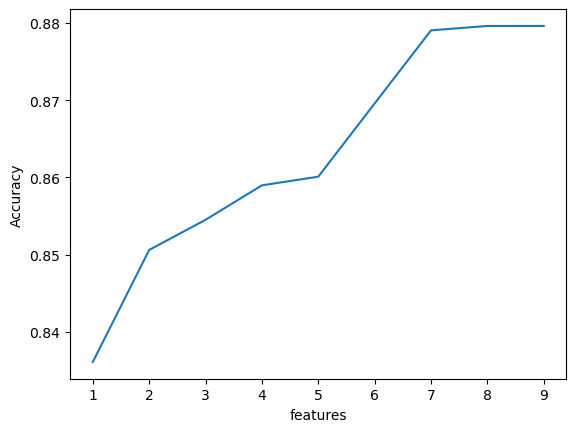

Selected features:  ['x11' 'x16' 'x18' 'x21' 'x27' 'x61' 'x65' 'x113' 'x148']


In [271]:
#------------------------------------------------------------------------------------------------------------------
# Find optimal number of features using cross-validation
#------------------------------------------------------------------------------------------------------------------

print("----- Optimal selection of number of features -----")

n_feats = [1, 2, 3, 4, 5, 6, 7, 8, 9]

acc_nfeat = []

for n_feat in n_feats:
    print('---- n features =', n_feat)
    
    acc_cv = []

    kf = StratifiedKFold(n_splits=5, shuffle = True)

    for train_index, test_index in kf.split(x, y):
    
        # Training phase
        x_train = x[train_index, :]
        y_train = y[train_index]     

        clf_cv = LogisticRegression(C=1.0, solver='liblinear')

        fselection_cv = SequentialFeatureSelector(clf_cv, n_features_to_select=n_feat)
        fselection_cv.fit(x_train, y_train)
        x_train = fselection_cv.transform(x_train)

        clf_cv.fit(x_train, y_train)

        # Test phase
        x_test = fselection_cv.transform(x[test_index, :])
        y_test = y[test_index]
        y_pred = clf_cv.predict(x_test)
    
        
        acc_i = accuracy_score(y_test, y_pred)
        acc_cv.append(acc_i)    

    acc = np.average(acc_cv)
    acc_nfeat.append(acc)
    
    print('ACC:', acc)

opt_index = np.argmax(acc_nfeat)
opt_features = n_feats[opt_index]
print("Optimal number of features: ", opt_features)

plt.plot(n_feats, acc_nfeat)
plt.xlabel("features")
plt.ylabel("Accuracy")

plt.show()

# Fit model with optimal number of features
clf = LogisticRegression(C=1.0, solver='liblinear')
fselection = SequentialFeatureSelector(clf, n_features_to_select = opt_features)
fselection.fit(x, y)

print("Selected features: ", fselection.get_feature_names_out())

<h3>6. Repite el paso 4, pero para un método de selección de características recursivo.</h3>

----- Optimal selection of number of features -----
---- n features = 1
ACC: 0.8361183299357309
---- n features = 2
ACC: 0.8433622259224102
---- n features = 3
ACC: 0.8628623893185603
---- n features = 4
ACC: 0.8740277929070508
---- n features = 5
ACC: 0.877927514355519
---- n features = 6
ACC: 0.8846174195857518
---- n features = 7
ACC: 0.8818210111887458
---- n features = 8
ACC: 0.8912917632778823
---- n features = 9
ACC: 0.8885124725727891
---- n features = 10
ACC: 0.8946437185851449
---- n features = 11
ACC: 0.8996623146231773
---- n features = 12
ACC: 0.8940943962901293
---- n features = 13
ACC: 0.9002271984562954
Optimal number of features:  13


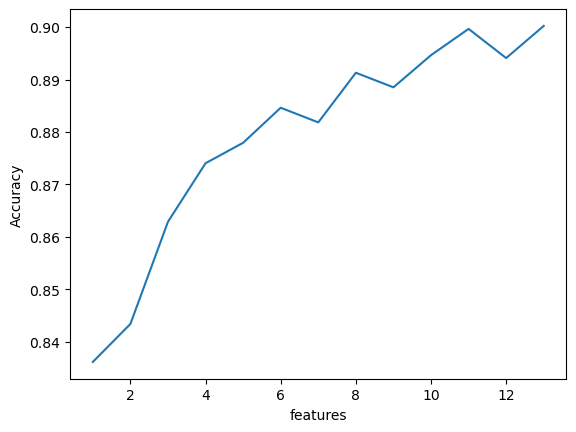

Selected features:  ['x11' 'x17' 'x20' 'x27' 'x28' 'x61' 'x62' 'x64' 'x66' 'x76' 'x96' 'x100'
 'x113']


In [272]:
#------------------------------------------------------------------------------------------------------------------
# Find optimal number of features using cross-validation
#------------------------------------------------------------------------------------------------------------------

print("----- Optimal selection of number of features -----")

n_feats = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

acc_nfeat = []

for n_feat in n_feats:
    print('---- n features =', n_feat)
    
    acc_cv = []

    kf = StratifiedKFold(n_splits=5, shuffle = True)

    for train_index, test_index in kf.split(x, y):
    
        # Training phase
        x_train = x[train_index, :]
        y_train = y[train_index]     

        clf_cv = LogisticRegression(C=1.0, solver='liblinear')

        fselection_cv = RFE(clf_cv, n_features_to_select=n_feat)
        fselection_cv.fit(x_train, y_train)
        x_train = fselection_cv.transform(x_train)

        clf_cv.fit(x_train, y_train)

        # Test phase
        x_test = fselection_cv.transform(x[test_index, :])
        y_test = y[test_index]
        y_pred = clf_cv.predict(x_test)
    
        
        acc_i = accuracy_score(y_test, y_pred)
        acc_cv.append(acc_i)    

    acc = np.average(acc_cv)
    acc_nfeat.append(acc)
    
    print('ACC:', acc)

opt_index = np.argmax(acc_nfeat)
opt_features = n_feats[opt_index]
print("Optimal number of features: ", opt_features)

plt.plot(n_feats, acc_nfeat)
plt.xlabel("features")
plt.ylabel("Accuracy")

plt.show()

# Fit model with optimal number of features
clf = LogisticRegression(C=1.0, solver='liblinear')
fselection = RFE(clf, n_features_to_select = opt_features)
fselection.fit(x, y)

print("Selected features: ", fselection.get_feature_names_out())

<h3>7. Escoge alguna de las técnicas de selección de características que probaste con anterioridad, y con el número óptimo de características encontrado, prepara tu modelo para producción haciendo lo siguiente:</h3>
        <ul>
            <li>Aplica el método de selección de características con todos los datos.</li>
            <li>Ajusta el modelo con las características encontradas.</li>
        </ul>

<h4>7.1 Aplica el método de selección de características con todos los datos.</h4>

In [273]:
# Fit model with optimal number of features
clf = LogisticRegression(C=1.0, solver='liblinear')
fselection = RFE(clf, n_features_to_select = opt_features)
fselection.fit(x, y)

RFE(estimator=LogisticRegression(solver='liblinear'), n_features_to_select=13)

<h4>7.2 Ajusta el modelo con las características encontradas.</h4>

In [274]:
x_transformed = fselection.transform(x)
clf.fit(x_transformed, y)

LogisticRegression(solver='liblinear')

<ul>
    <li>
        <strong>¿Qué pasa si no se considera el problema de tener datos desbalanceados para este caso? ¿Por qué?</strong>
        <ul>
            <li><strong>Desempeño Desigual:</strong> El recall para la Clase 1 (0.696) es notablemente más bajo que el de la Clase 2 (0.941). Esto sugiere que el modelo tiene dificultades para identificar correctamente los ejemplos de la Clase 1, mientras que está funcionando bien para la Clase 2.</li>
            <li><strong>Accuracy Engañosa:</strong> La precisión general (accuracy) es alta (0.905), pero esta métrica puede ser engañosa en presencia de desbalanceo de clases. En casos de desbalanceo, un modelo puede lograr una alta precisión general al predecir predominantemente la clase mayoritaria, mientras que ignora o clasifica incorrectamente la clase minoritaria.</li>
            <li><strong>Desbalance en los Datos:</strong> La diferencia significativa en los recalls indica que puede haber un desbalance en la cantidad de ejemplos entre las clases. Esto podría estar afectando la capacidad del modelo para predecir con precisión la clase minoritaria.</li>
            <li>No abordar el problema de datos desbalanceados puede llevar a un modelo que parece tener un buen rendimiento general pero que falla en predecir correctamente la clase minoritaria. Considerar el desbalanceo de clases es crucial para asegurar que el modelo tenga un rendimiento equitativo en todas las clases y para evitar un sesgo hacia las clases mayoritarias.</li>
        </ul>
    </li>
    <br>
    <li>
        <strong>De todos los clasificadores, ¿cuál o cuáles consideras que son adecuados para los datos? ¿Qué propiedades tienen dichos modelos que los hacen apropiados para los datos? Argumenta tu respuesta.</strong>
        <ul>
            <li><strong>Logistic Regression:</strong> Precisión promedio de 0.905, es simple, interpretable y eficiente. Ideal para relaciones lineales y conjuntos de datos pequeños.</li>
            <li><strong>Support Vector Classifier (SVC):</strong> Precisión promedio de 0.900, flexible con margen máximo, adecuado para datos no lineales y con ruido.</li>
            <li><strong>Gaussian Naive Bayes:</strong> Precisión promedio de 0.900, rápido y eficiente para datos pequeños, basado en la independencia entre características.</li>
            <li>Estos modelos son apropiados por su buen rendimiento, eficiencia y capacidad de interpretación.</li>
        </ul>
    </li>
    <br>
    <li>
        <strong>¿Es posible reducir la dimensionalidad del problema sin perder rendimiento en el modelo? ¿Por qué?</strong>
        <ul>
            <li><strong>Selección Óptima:</strong> El número óptimo de características es 12, donde la precisión del modelo es máxima (0.8818). Esto indica que el modelo se beneficia de una cierta cantidad de características sin perder rendimiento, y más características podrían no ofrecer mejoras significativas.</li>
            <li><strong>Eficiencia:</strong> Reducir la dimensionalidad puede mejorar la eficiencia del modelo, haciendo que sea más rápido de entrenar y menos propenso al sobreajuste, siempre y cuando se mantengan las características más relevantes.</li>
        </ul>
    </li>
    <br>
    <li>
        <strong>¿Qué método de selección de características consideras el más adecuado para este caso? ¿Por qué?</strong>
        <ul>
            <li><strong>Rendimiento Óptimo:</strong> RFE logra el mejor rendimiento en términos de precisión (ACC) con un número óptimo de 13 características (0.9002). Esto supera a los otros métodos, que ofrecen un rendimiento máximo con menos características.</li>
            <li><strong>Incremento en Precisión:</strong> A medida que se añaden más características con RFE, la precisión sigue aumentando hasta llegar a un punto óptimo con 13 características. Esto indica que RFE selecciona características de alta calidad que contribuyen significativamente al rendimiento del modelo.</li>
            <li><strong>Consistencia y Adaptación:</strong> RFE evalúa la importancia de las características y elimina las menos significativas de manera iterativa, lo que permite una selección más precisa y adaptada al rendimiento del modelo. RFE es el método más adecuado para tu caso porque maximiza la precisión del modelo y proporciona una selección de características que realmente mejora el rendimiento.</li>
        </ul>
    </li>
    <br>
    <li>
        <strong>Si quisieras mejorar el rendimiento de tus modelos, ¿qué más se podría hacer?</strong>
        <ul>
            <li><strong>Ajuste de Hiperparámetros:</strong> Realiza una búsqueda exhaustiva de hiperparámetros usando Grid Search o Random Search para encontrar las mejores configuraciones para tus modelos.</li>
            <li><strong>Ingeniería de Características:</strong> Crea nuevas características basadas en el conocimiento del dominio y la combinación de características existentes para mejorar la capacidad del modelo de capturar patrones relevantes.</li>
            <li><strong>Manejo del Desbalance de Clases:</strong> Implementa técnicas para manejar el desbalance de clases, como el sobremuestreo o el submuestreo, para mejorar el rendimiento en clases minoritarias.</li>
        </ul>
    </li>
</ul>
